In [1]:
# This is for testing code

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
def compute_cost(x, y, theta, m): # Compute cost for linear regression.

    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors) # cost function, sum of squared errors
    return J

In [72]:
def gradient_descent(x, y, theta, alpha, iterations, length): # Compute cost for linear regression.

    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / length) * x.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(x, y, theta, length)
    return theta, cost_history

In [160]:
def data_organize(data,length): # Organize data into matrix for use with gradient descent
    
    
    R = np. size(data, 1)
    
    for k in range(R)
        C[i] = 0
    
    for i in range(len(C)):
        B = data.values[:, i]
        X = B.reshape(length, 1)
        C[i] = X
        
    initial = np.ones((length, 1)) # Create a 99x1 array of ones
    X_tot = np.hstack((initial,C[0],C[1],C[2],C[3],C[4]))
    Y = data.values[:, 5]
        
    return X_tot, Y

In [161]:
# Import housing list 
housing = pd.read_csv('Housing.csv')
housing.shape

varlist1 = ['area','bedrooms','bathrooms','stories','parking','price']

C1 = np.zeros(6)
C2 = [0, 0, 0, 0, 0, 0]
print(len(C1))
print(len(C2))

6
6


In [162]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively. (columns?)
np.random.seed(0)
df_train, df_test = train_test_split(housing, test_size = 0.3, train_size = 0.7, random_state = 1 )

# Get the lengths of the training and test set
mTrain = len(df_train)
mTest = len(df_test)

print('Dimensions of df_train:',df_train.shape)
print('Dimensions of df_train:',df_test.shape)

cols = len(df_train.columns)
print(cols)


Dimensions of df_train: (381, 13)
Dimensions of df_train: (164, 13)
13


In [163]:
df_Newtrain = df_train[varlist1]
df_Newtest = df_test[varlist1]
print('Dimensions of training set used in 1a:', df_Newtrain.shape)
print(df_Newtrain[: 5])

Dimensions of training set used in 1a: (381, 6)
     area  bedrooms  bathrooms  stories  parking    price
180  4500         4          2        1        2  5215000
189  3540         2          1        1        0  5040000
93   7200         3          2        1        3  6300000
444  3120         3          1        2        0  3220000
81   4000         3          2        2        1  6615000


In [164]:
xTrain, yTrain = data_organize(df_Newtrain,mTrain)
xTest, yTest = data_organize(df_Newtest,mTest)

print('Shape of xTrain:',np.shape(xTrain))
print('Shape of yTrain:',np.shape(yTrain))

print('Shape of test matrix:',np.shape(xTest))

#print(yTrain)

ValueError: setting an array element with a sequence.

In [136]:
theta = np.zeros(6) # row vector for Theta initialized to 0
iterations = 100;

alpha1 = 0.01; # Comparing 3 different training rates
alpha2 = 0.02;
alpha3 = 0.042;

theta

array([0., 0., 0., 0., 0., 0.])

In [137]:
# Run Cost History and Gradient Descent algorithms for training data
theta1, cost_history1 = gradient_descent(xTrain, yTrain, theta, 0.00000001, iterations, mTrain)
#thetaNorm, cost_historyNorm = gradient_descent(X_totNorm, Ynorm, theta, alpha1, iterations)

# Run Cost History function for training data

print('Final value of theta1 =', theta1)
print('Cost History:', cost_history1[: 10]) # Here the cost history just blows up without a small enough learning rate

Final value of theta1 = [5.33762575e-01 8.36267882e+02 1.88278637e+00 1.00780303e+00
 1.50180746e+00 4.65706697e-01]
Cost History: [6.86350247e+12 4.05059696e+12 2.76595428e+12 2.17926310e+12
 1.91132356e+12 1.78895663e+12 1.73307212e+12 1.70754986e+12
 1.69589392e+12 1.69057067e+12]


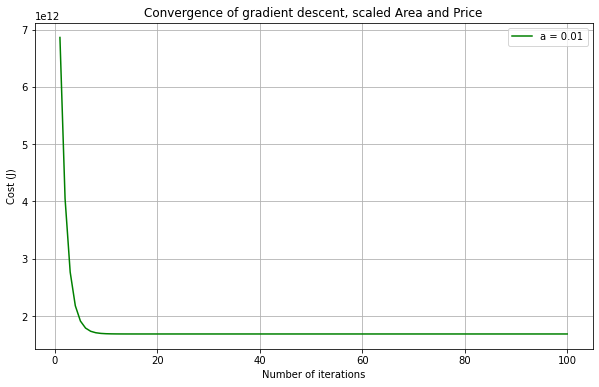

In [138]:
# plt.plot(range(1, iterations + 1),cost_history1, color='blue', label='a = 0.00000001')
plt.plot(range(1, iterations + 1),cost_history1, color='green', label='a = 0.01')
#plt.plot(range(1, iterations + 1),cost_historyNorm, color='Blue', label='a = 0.01')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent, scaled Area and Price')
plt.legend()

In [92]:
x = 2
y = "awesome"
z =  str(x) + y
print(z)

2awesome


In [115]:
print(str(1))

1
